# Matplotlib vs. Plotly: Let's Decide Once and for All
## Deep and rapid comparison in terms of 8 aspects
![](images/1.png)
<figcaption style="text-align: center;">
    <strong>
        Goofy Image by Author
    </strong>
</figcaption>

### Setup

In [1]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from script import plot_scores

warnings.filterwarnings("ignore")

### Introduction

There is an annoying habit of soccer fans. Whenever a young but admittedly exceptional player emerges they start comparing him to legends like Messi or Ronaldo. They choose to forget that the legends have been dominating the game since before the newbies had regrown teeth. 

Comparing Plotly to Matplotlib was, in a sense, similar to that in the beginning. Matplotlib had been in heavy use sine 2003 and Plotly had just come out in 2014. Many were bored with Matplotlib by this time, so Plotly was warmly welcomed for its freshness and interactivity. Still, the library couldn't hope to steal the top spot as the king of Python plotting packages from Matplotlib.

In 2019, things changed dramatically when Plotly released its [Express API](https://towardsdev.com/comprehensive-guide-to-plotly-express-in-python-the-hottest-graphing-library-e42e911a56c8?source=your_stories_page-------------------------------------) in July. This fueled an explosion of interest into the library and people started using it left and right. With another major version (5.0.0) released in June this year, I think the library is more that enough mature to seriously comprare it Matplotlib.

With that said, let's get started:

```python
# Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Import a custom function to score
from script import plot_scores
```

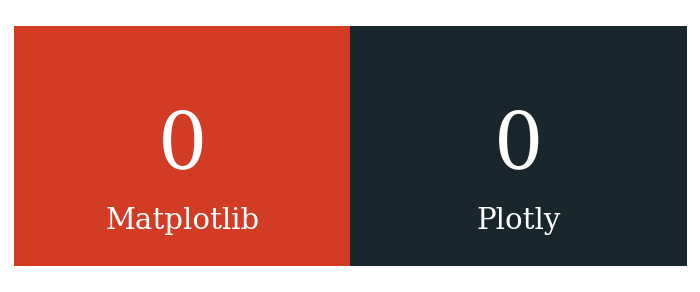

In [21]:
plot_scores(mpl=0, px=0)

## 1. API usability

Let's start by looking at how easy it is to use their APIs. Both offer high-level and low-level APIs to interact with the core functionality. 

### 1.1 **Consistency of higher-level APIs (Pyplot vs. Express)**
On the one hand, Express excels in consistency because of the low number of function calls that can be accessed. It is only used as a higher-level interface to access the plots built-in to Plotly. All plot calls to Express returns the core Figure object.

On the other hand, plot calls in Pyplot have the same signature but they return completely different things. For example, `plt.scatter` returns a `PathCollection` object whereas `plt.boxplot` returns a dictionary. This is due to the fact that Matplotlib implements different base classes for each plot type. It can be truly confusing for many. 

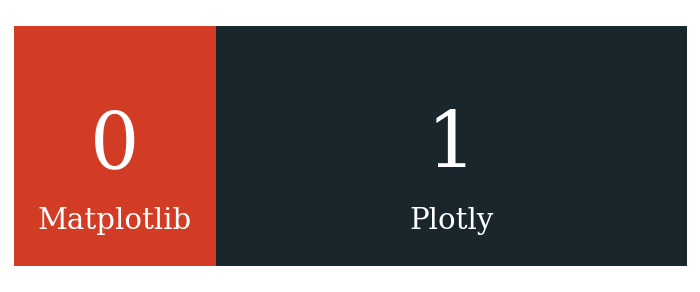

In [26]:
plot_scores(mpl=0, px=1)

### 1.2 **Amount of code required to switch between APIs**

To switch from Pyplot to OOP API of Matplotlib, you just change the way you interact with the core data structures such as `figure` and `axes` objects. Calls to plots have similar signatures and the parameter names do not change. 

Switching from Express to Graph Objects requires a steep learning curve (much steeper than Matplotlib's). The whole API changes. Especially, GO adds much more parameters to each plot call to allow more customization. This comes at the cost of making some plots unusually complex. Besides, GO moves some of the core parameters outside the plot calls.

For example, creating logarithmic axes can be achieved directly inside a plot in Express, while in GO, you do this with `update_layout` or `update_axes` functions. This is not the case in Pyplot or OOP Matplotlib.

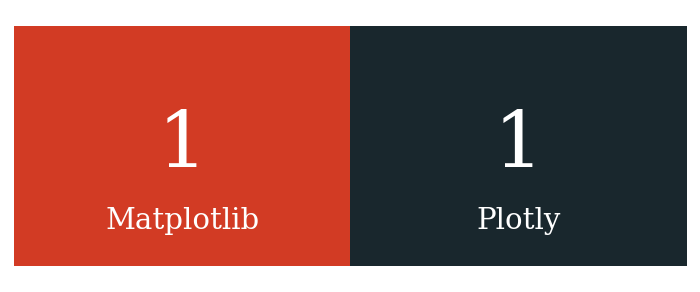

In [27]:
plot_scores(mpl=1, px=1)

### 1.3 Customization API

Even though there is a separate section on customization, we have to talk about it in terms of API. 

All customizations in Matplotlib have unique functions. This allows you to make changes to the plot in chunks of code and using loops or other procedures. Each functions make use of meaningful parameters.

In contrast, Plotly uses dictionaries extensively. While this may offer certain consistency to the way you interact with the plots and data, it comes at the heavy cost of code readability and length. As many people prefer the `update_layout` function, its arguments often end up with a jungle of nested dictionaries. 

You may pause and think about these differences between the APIs but Matplotlib' is more Pythonic and readable.

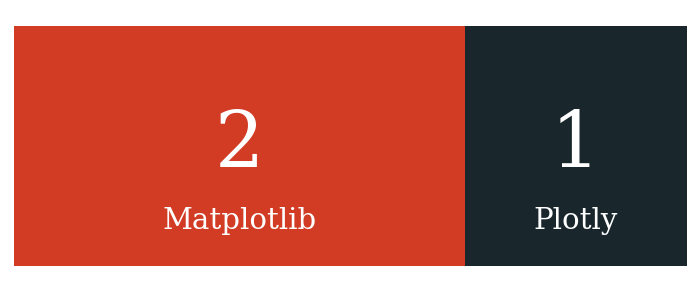

In [28]:
plot_scores(2, 1)

## 2. Speed

To see the true difference between speed, we have to use bigger datasets. I will import the diamonds dataset from Seaborn and compare the time it takes to plot a simple scatterplot. I will be using the `%%timeit` magic command which runs the same chunk of code several times so that we can see the standard deviation error:

In [42]:
import seaborn as sns

# Import the dataset
diamonds = sns.load_dataset("diamonds")
diamonds.shape

(53940, 10)

9.42 ms ± 813 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


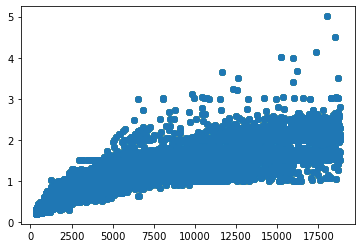

In [46]:
%%timeit

# Measure Matplotlib
plt.scatter(
    diamonds["price"],
    diamonds["carat"],
);

```python
%%time

# Measure Plotly
fig = px.scatter(data_frame=diamonds, x="price", y="carat")

fig.show()

733 ms ± 43.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```



Matplotlib is almost 80 times faster than Plotly with much lower SD errors. Maybe this is due to the fact that Plotly renders interactive plots. Let's check the speeds once again, this time turning off the interactivity:

```python

%%timeit

config = {"staticPlot": True}

fig = px.scatter(data_frame=diamonds, x="price", y="carat")

fig.show(config=config)

718 ms ± 92.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```



Unfortunately, turning off interactivity didn't help much. Matplotlib crushes Plotly in terms of speed:

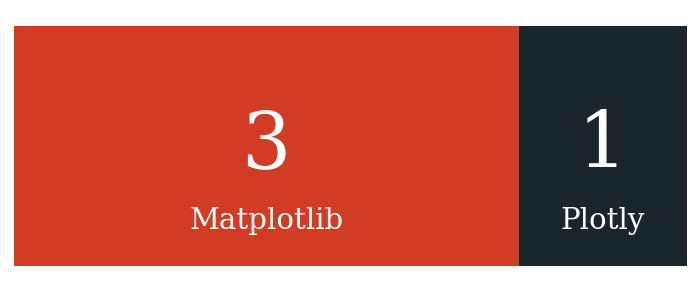

In [60]:
plot_scores(3, 1)

## 3. Number of Supported Plot Types

In this area, Plotly clearly takes the lead. From the Plotly API reference, I counted close to 50 unique traces. Especially, Plotly is absolutely superb when it comes to certain type of plots. For example, it has a dedicated support for Finance industry and `figure_factory` subpackage API to create specific complex charts. 

On the other hand, Matplotlib has a modest selection of plots. I don't think that if we have counted the plots from Seaborn, they would quite match the rich selection that Plotly offers:

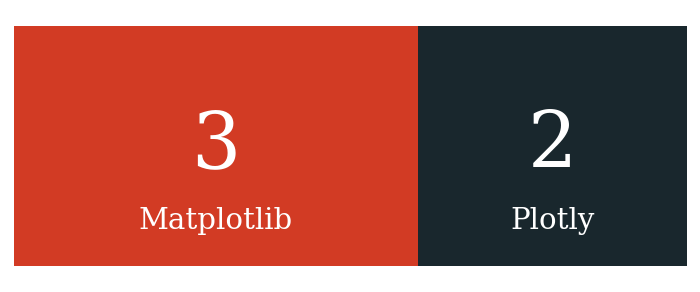

In [65]:
plot_scores(3, 2)

## 4. Interactivity

Um, how can we compare interactivity if only Plotly has this feature?

Well, not many know this but outside Jupyter Notebooks, Matplotlib plots render in an interactivity mode by default.

![](images/2.png)

Unfortunately, this level of interactivity is nothing compared to Plotly's. So, let's raise Plotly's score by one:

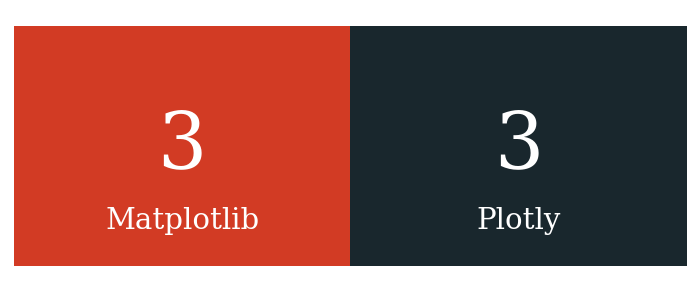

In [66]:
plot_scores(3, 3)

Now, for the tiebreaker - apart from general interactivity, Plotly also offers custom buttons:
![](images/gif.gif)

Sliders:

![](images/gif2.gif)

and many more features that take the whole user-experience to the next level. This deserves another point:

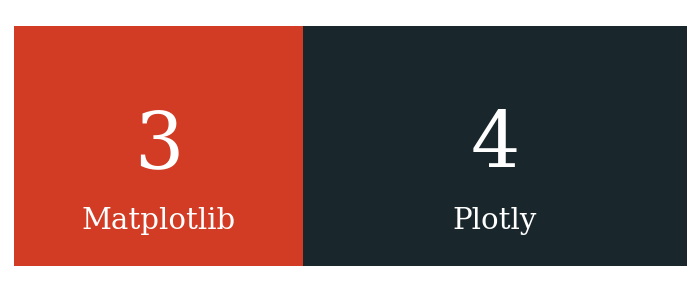

In [67]:
plot_scores(3, 4)